# I- Affichage des données MNIST

In [2]:
from sklearn.datasets import fetch_openml
import numpy as np
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist["target"] = mnist["target"].astype(np.uint8)
np.random.seed(42)
m = 10000
idx = np.random.permutation(60000)[:m]
X = mnist['data'][idx]
y = mnist['target'][idx]

## 1- Utilisation de la méthode PCA

Shape of reduced data: (10000, 2)


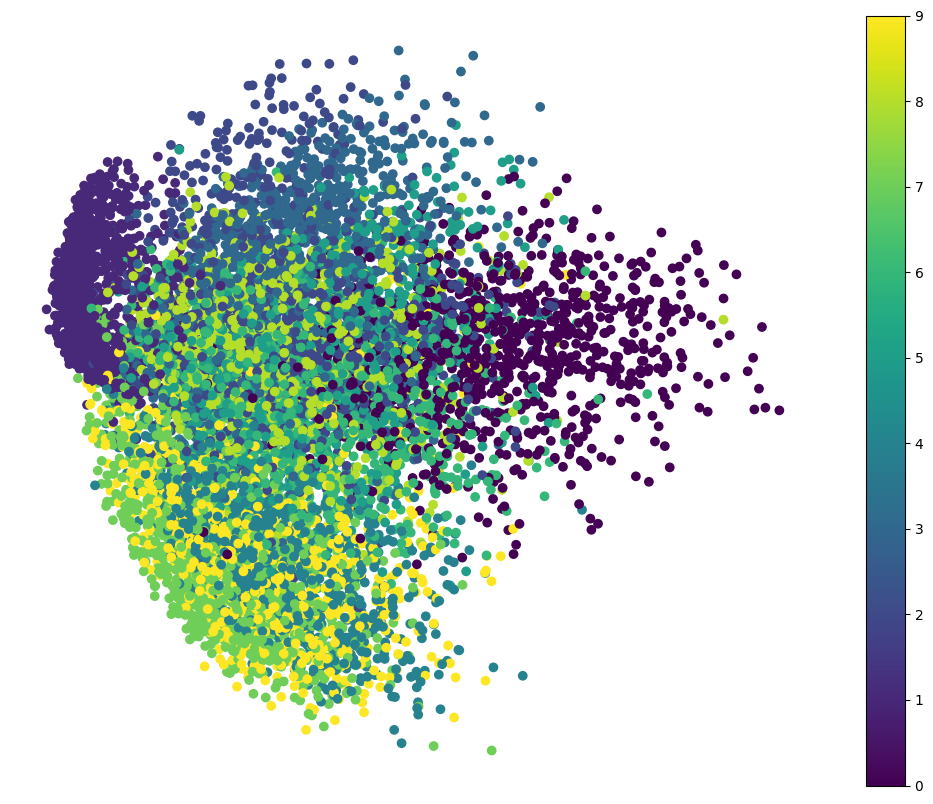


Le résultat d'affichage permet de donner une idée claire sur la distribution des instances de MNIST ?


In [4]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA with 2 components
pca = PCA(n_components=2)
X_pca_reduced = pca.fit_transform(X)

# Verify the new dimension
print("Shape of reduced data:", X_pca_reduced.shape)

# Visualize the reduced data
plt.figure(figsize=(13,10))
plt.scatter(X_pca_reduced[:, 0], X_pca_reduced[:, 1], c=y)
plt.axis('off')
plt.colorbar()
plt.show()

# Answer the question about the visualization
print("\nLe résultat d'affichage permet de donner une idée claire sur la distribution des instances de MNIST ?")

## 2- Utilisation de la méthode t-SNE

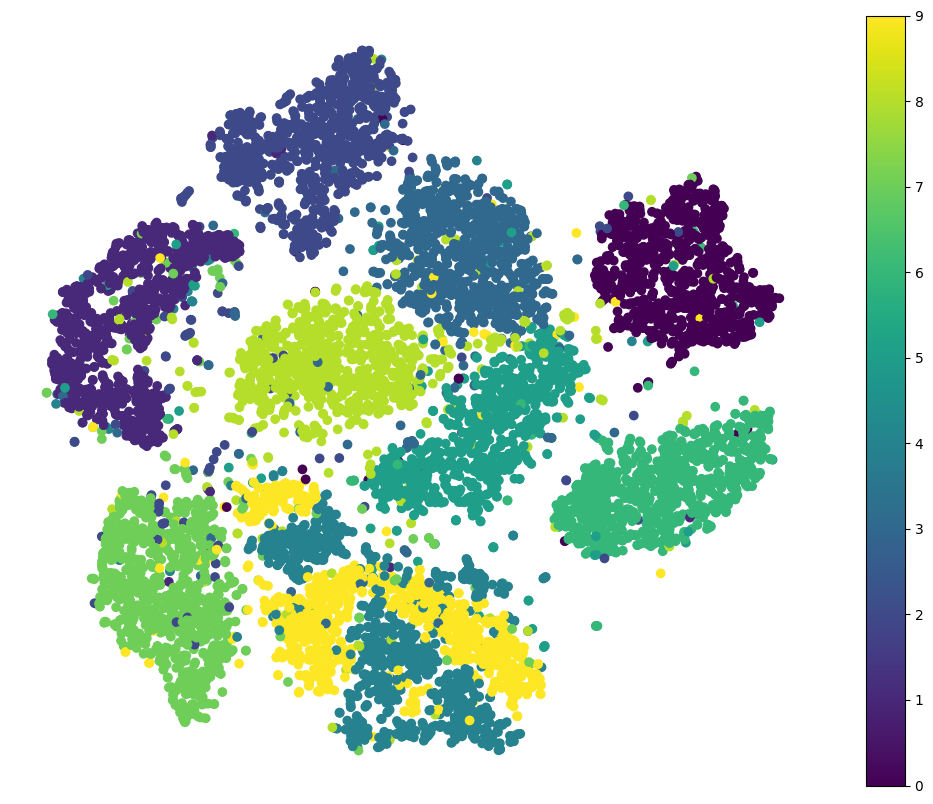

In [5]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Apply t-SNE with 2 components
tsne = TSNE(n_components=2, random_state=42)
X_tsne_reduced = tsne.fit_transform(X)

# Visualize the reduced data
plt.figure(figsize=(13,10))
plt.scatter(X_tsne_reduced[:, 0], X_tsne_reduced[:, 1], c=y)
plt.axis('off')
plt.colorbar()
plt.show()

# II- PCA sur les données MNIST

## 1- Résultats de RandomForest SANS la réduction de la dimensionnalité des données

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time

# Divide the dataset into training and test sets
X_train = mnist['data'][:60000]
y_train = mnist['target'][:60000]
X_test = mnist['data'][60000:]
y_test = mnist['target'][60000:]

# Apply RandomForest classification and measure execution time
start_time = time.time()
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(X_train, y_train)
end_time = time.time()

# Calculate and display the training time
training_time = end_time - start_time
print(f"Temps d'exécution nécessaire pour l'apprentissage : {format(training_time, '.2f')} secondes")

# Evaluate the model on the test set
y_pred = rnd_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Taux de classification sur la base de test : {format(accuracy, '.4f')}")

Temps d'exécution nécessaire pour l'apprentissage : 62.07 secondes
Taux de classification sur la base de test : 0.9705


## 2- Résultats de RandomForest AVEC la réduction de la dimensionnalité des données

In [7]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time

# Apply PCA with 95% variance retention on the training data
pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)
print(f"Original training data shape: {X_train.shape}")
print(f"Reduced training data shape: {X_train_reduced.shape}")

# Apply RandomForest classification on the reduced training data and measure execution time
start_time = time.time()
rnd_clf_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf_pca.fit(X_train_reduced, y_train)
end_time = time.time()

# Calculate and display the training time
training_time_pca = end_time - start_time
print(f"\nTemps d'exécution nécessaire pour l'apprentissage (avec PCA): {format(training_time_pca, '.2f')} secondes")

# Apply PCA on the test data using the fitted PCA object from the training data
X_test_reduced = pca.transform(X_test)
print(f"Original test data shape: {X_test.shape}")
print(f"Reduced test data shape: {X_test_reduced.shape}")

# Evaluate the model on the reduced test set
y_pred_pca = rnd_clf_pca.predict(X_test_reduced)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"\nTaux de classification sur la base de test (avec PCA): {format(accuracy_pca, '.4f')}")

Original training data shape: (60000, 784)
Reduced training data shape: (60000, 154)

Temps d'exécution nécessaire pour l'apprentissage (avec PCA): 192.85 secondes
Original test data shape: (10000, 784)
Reduced test data shape: (10000, 154)

Taux de classification sur la base de test (avec PCA): 0.9488


## 3- Résultats de Softmax SANS la réduction de la dimensionnalité des données

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time

# Apply Logistic Regression classification and measure execution time
start_time = time.time()
softmax_reg = LogisticRegression(solver="lbfgs", multi_class="multinomial", random_state=42)
softmax_reg.fit(X_train, y_train)
end_time = time.time()

# Calculate and display the training time
training_time_softmax = end_time - start_time
print(f"Temps d'exécution nécessaire pour l'apprentissage (avec Softmax): {format(training_time_softmax, '.2f')} secondes")

# Evaluate the model on the test set
y_pred_softmax = softmax_reg.predict(X_test)
accuracy_softmax = accuracy_score(y_test, y_pred_softmax)
print(f"Taux de classification sur la base de test (avec Softmax): {format(accuracy_softmax, '.4f')}")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Temps d'exécution nécessaire pour l'apprentissage (avec Softmax): 42.55 secondes
Taux de classification sur la base de test (avec Softmax): 0.9255


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 4- Résultats de Softmax AVEC la réduction de la dimensionnalité des données

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time

# Apply Logistic Regression classification on the reduced training data and measure execution time
start_time = time.time()
softmax_reg_pca = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)
softmax_reg_pca.fit(X_train_reduced, y_train)
end_time = time.time()

# Calculate and display the training time
training_time_softmax_pca = end_time - start_time
print(f"Temps d'exécution nécessaire pour l'apprentissage (avec Softmax et PCA): {format(training_time_softmax_pca, '.2f')} secondes")

# Evaluate the model on the reduced test set
y_pred_softmax_pca = softmax_reg_pca.predict(X_test_reduced)
accuracy_softmax_pca = accuracy_score(y_test, y_pred_softmax_pca)
print(f"Taux de classification sur la base de test (avec Softmax et PCA): {format(accuracy_softmax_pca, '.4f')}")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Temps d'exécution nécessaire pour l'apprentissage (avec Softmax et PCA): 16.50 secondes
Taux de classification sur la base de test (avec Softmax et PCA): 0.9201


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
